In [3]:
from google.colab import drive 
drive.mount('/content/gdrive') 
diabetes = '/content/gdrive/My Drive/diabetes.csv'
bc = '/content/gdrive/My Drive/breastcancer.csv'

Mounted at /content/gdrive


In [2]:
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

ICP Part 1

Using the diabetes dataset

In [ ]:
#Diabetes dataset
dataset = pd.read_csv(diabetes, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
#Adding 3 additional dense layers to see how accuracy changes
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # additional hidden layer
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # additional hidden layer
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # additional hidden layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 4.4076 - acc: 0.4253
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1.4218 - acc: 0.4149
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9696 - acc: 0.4861
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7786 - acc: 0.5208
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6905 - acc: 0.6285
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6513 - acc: 0.6684
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6242 - acc: 0.6632
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6187 - acc: 0.6649
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6014 - acc: 0.6962
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5991 - acc: 0.6788
Epoch 11/100
18/18 [==============================] - 0s 2m

Accuracy with only 1 dense layer: ~0.6771

Accuracy with 3 dense layers: ~0.7240

Adding the additional dense layers improved the accuracy ~5% which seems to be a efficient increase with only 3 extra lines of code.

Using the breast cancer dataset

In [50]:
dataset = pd.read_csv(bc)
dataset = dataset.drop(columns = ['id','Unnamed: 32'])
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})
data = dataset.values

In [51]:
#Breast Cancer dataset
#dataset = pd.read_csv(bc).values

X_train, X_test, Y_train, Y_test = train_test_split(data[:,1:31], data[:,0],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer
#Adding 3 additional dense layers to see how accuracy changes
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # additional hidden layer
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # additional hidden layer
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # additional hidden layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 19.1218 - acc: 0.4249
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 8.7200 - acc: 0.3709
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 5.0494 - acc: 0.4601
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 2.2647 - acc: 0.5376
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.8119 - acc: 0.7183
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3614 - acc: 0.8779
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2349 - acc: 0.9178
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2206 - acc: 0.9225
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2183 - acc: 0.9225
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2782 - acc: 0.8850
Epoch 11/100
14/14 [==============================] - 0s 2

The model that includes 4 dense layers had an accuracy ~0.8741

Normalizing the data using StandardScaler

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Fitting the scaler using only the training data
X_train = sc.fit_transform(X_train)
#Transforming the testing data using the scaler that was fitted on the training data
X_test = sc.transform (X_test)

my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer
#Adding 3 additional dense layers to see how accuracy changes
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # additional hidden layer
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # additional hidden layer
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # additional hidden layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.5856 - acc: 0.7958
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4443 - acc: 0.9155
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3071 - acc: 0.9437
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2066 - acc: 0.9531
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1495 - acc: 0.9624
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1189 - acc: 0.9671
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0969 - acc: 0.9695
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0815 - acc: 0.9742
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0716 - acc: 0.9765
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0628 - acc: 0.9836
Epoch 11/100
14/14 [==============================] - 0s 3m

Scaling the data using StandardScaler seems to have helped with the accuracy of the model tremendously. This can be seen because the variables used in the model have different ranges/magnitude and variance so scaling/normalizing them to be on the same 'scale' helps to reduce the variety of ranges and variance among the variables. This technique can help to alleviate the effect that outliers present in the data have on the training process of the model.

ICP Part 2:

MNIST digits dataset

In [53]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2909 - accuracy: 0.9097 - val_loss: 0.1206 - val_accuracy: 0.9606
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1008 - accuracy: 0.9693 - val_loss: 0.1136 - val_accuracy: 0.9618
Epoch 3/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.1093 - val_accuracy: 0.9667
Epoch 4/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0624 - val_accuracy: 0.9795
Epoch 5/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.1041 - val_accuracy: 0.9665
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0598 - val_accuracy: 0.9812
Epoch 7/10
235/235 [==============================] - 5s 20ms/st

Plotting training & validation loss and accuracy

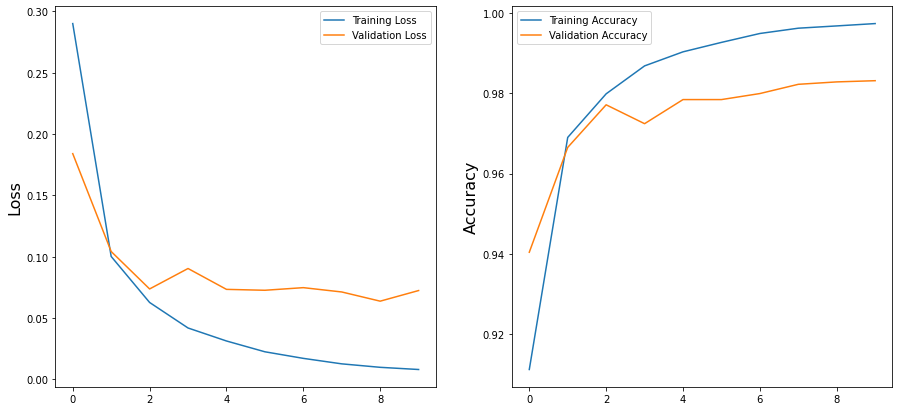

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize = 16)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize = 16)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

The loss graph may be showing signs of overfitting because of the training loss going towards zero while the validation loss is not steadily decreasing, training with more epochs would likely help answer that question.

The accuracy graph also shows that there may be some slight overfitting because of the gap between the training and validation curves.

Plotting & predicting an image with the model

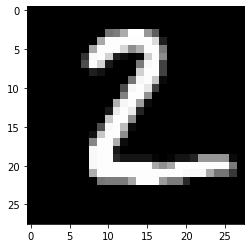

1/1 [==============================] - 0s 19ms/step
2


In [6]:
plt.imshow(test_data[1].reshape(28,28), cmap='gray')
plt.show()
pred = model.predict(test_data[1].reshape(1,784))
print(pred.argmax())

The model predicted the number to be a 2 and it was correct as you can see on the above plot.

Adding hidden layers & changing activation function

In [7]:
model2 = Sequential()
#Adding 3 hidden layers and changing from relu to tanh
model2.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model2.add(Dense(512, activation='tanh'))
model2.add(Dense(512, activation='tanh'))
model2.add(Dense(512, activation='tanh'))
model2.add(Dense(512, activation='tanh'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 12s 50ms/step - loss: 0.5124 - accuracy: 0.8533 - val_loss: 0.2828 - val_accuracy: 0.9105
Epoch 2/10
235/235 [==============================] - 11s 47ms/step - loss: 0.1749 - accuracy: 0.9470 - val_loss: 0.1760 - val_accuracy: 0.9458
Epoch 3/10
235/235 [==============================] - 11s 45ms/step - loss: 0.1125 - accuracy: 0.9654 - val_loss: 0.2095 - val_accuracy: 0.9395
Epoch 4/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0815 - accuracy: 0.9750 - val_loss: 0.1334 - val_accuracy: 0.9588
Epoch 5/10
235/235 [==============================] - 12s 49ms/step - loss: 0.0603 - accuracy: 0.9804 - val_loss: 0.1093 - val_accuracy: 0.9686
Epoch 6/10
235/235 [==============================] - 11s 48ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.1976 - val_accuracy: 0.9489
Epoch 7/10
235/235 [==============================] - 11s 48ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0984 - val_accuracy:

I added 3 more hidden layers and changed all of the activation functions to tanh instead of ReLu, the validation loss and accuracy did not change much, but the model using less hidden layers and the ReLu activation function seemed to perform slightly better.

Training without scaling the images on original model

In [8]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#Using images that are not scaled with the original model

#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(dimData,)))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

784
Epoch 1/10
235/235 [==============================] - 7s 28ms/step - loss: 5.7078 - accuracy: 0.8764 - val_loss: 1.7800 - val_accuracy: 0.8496
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.4069 - accuracy: 0.9467 - val_loss: 0.4734 - val_accuracy: 0.9343
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.2462 - accuracy: 0.9589 - val_loss: 0.3291 - val_accuracy: 0.9458
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1937 - accuracy: 0.9668 - val_loss: 0.2498 - val_accuracy: 0.9590
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1611 - accuracy: 0.9715 - val_loss: 0.3093 - val_accuracy: 0.9590
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1520 - accuracy: 0.9758 - val_loss: 0.2876 - val_accuracy: 0.9636
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1335 - accuracy: 0.9789 - val_loss: 0.2770 - val_accuracy: 0.

Training without scaling the images on model from part 3

In [9]:
model4 = Sequential()
#Using images that are not scaled
#Added 3 more hidden layers and changed activation function to tanh
model4.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model4.add(Dense(512, activation='tanh'))
model4.add(Dense(512, activation='tanh'))
model4.add(Dense(512, activation='tanh'))
model4.add(Dense(512, activation='tanh'))
model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model4.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 12s 49ms/step - loss: 0.5697 - accuracy: 0.8357 - val_loss: 0.2863 - val_accuracy: 0.9158
Epoch 2/10
235/235 [==============================] - 13s 53ms/step - loss: 0.2215 - accuracy: 0.9313 - val_loss: 0.2400 - val_accuracy: 0.9287
Epoch 3/10
235/235 [==============================] - 11s 48ms/step - loss: 0.1717 - accuracy: 0.9470 - val_loss: 0.1940 - val_accuracy: 0.9426
Epoch 4/10
235/235 [==============================] - 11s 47ms/step - loss: 0.1476 - accuracy: 0.9536 - val_loss: 0.1842 - val_accuracy: 0.9413
Epoch 5/10
235/235 [==============================] - 10s 42ms/step - loss: 0.1280 - accuracy: 0.9593 - val_loss: 0.1793 - val_accuracy: 0.9456
Epoch 6/10
235/235 [==============================] - 11s 48ms/step - loss: 0.1118 - accuracy: 0.9646 - val_loss: 0.1358 - val_accuracy: 0.9581
Epoch 7/10
235/235 [==============================] - 12s 52ms/step - loss: 0.1028 - accuracy: 0.9676 - val_loss: 0.1408 - val_accuracy:

The validation loss when training with only 2 hidden layers and not scaling the images seemed consistently stay much higher than on the models where the images were scaled. The validation loss on the model with 5 hidden layers was slightly better than the other model but still significantly worse than the models that had scaled images fed into them. 

The validation accuracy did not drop significantly for either model that did not scale the images, but it was worse so it is clear that it is beneficial to scale images that input into neural networks.